In [ ]:
import pandas as pd 
import numpy as np  
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  

In [60]:

files = ['202505_cht.ods','202506_cht.ods','202507_cht.ods']
entry_data = pd.Series()
exit_data = pd.Series()
select_num  = 4
f = pd.read_excel(files[0], engine='odf', sheet_name=1)
r_v = np.random.choice(f.keys(),(select_num,), replace=False)
for f in files:
    entry_f = pd.read_excel(f, engine='odf', sheet_name=1)[np.hstack((r_v,np.array(["　　　　車站日期"])))]
    exit_f = pd.read_excel(f, engine='odf', sheet_name=0)[np.hstack((r_v,np.array(["　　　　車站日期"])))]
    
    if entry_data.empty and exit_data.empty:
        entry_data = entry_f
        exit_data = exit_f
        continue
    entry_data = pd.concat([entry_data, entry_f], ignore_index=True)
    exit_data = pd.concat([exit_data, exit_f], ignore_index=True)
    

date_data = entry_data['　　　　車站日期']
entry_data.drop(['　　　　車站日期'], axis=1, inplace=True)
exit_data.drop(['　　　　車站日期'], axis=1, inplace=True)

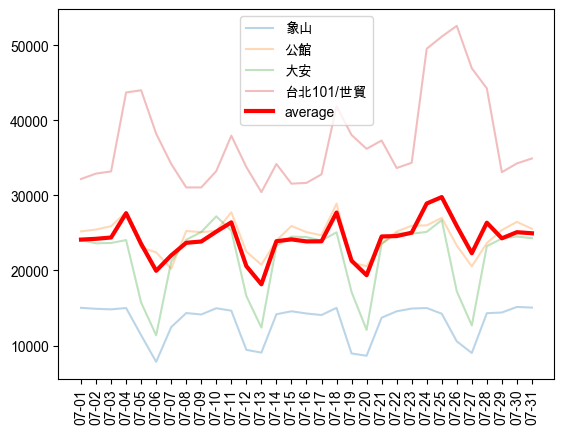

In [ ]:

month_date = [31,30,31]
random_month = np.random.choice([1,2,3])
start_day = sum(month_date[:random_month-1])
end_day = start_day + month_date[random_month-1]
for entry_name in entry_data.keys():
    plt.plot(entry_data[entry_name][start_day:end_day], label=f'{entry_name}', alpha=0.3)

entry_avg = np.average(entry_data[:], axis=1)
entry_avg = pd.Series(entry_avg, index=entry_data.index)
entry_avg.dropna(inplace=True)
plt.plot(entry_avg[start_day:end_day], label='entry_avg', color='red', linewidth=3)


date_series = pd.to_datetime(date_data[start_day:end_day])
dates = date_series.dt.strftime('%m-%d').to_list()
plt.xticks(range(start_day, end_day), dates, rotation=90)
plt.legend(entry_data.keys().to_list()+['average'])
plt.show()